При помощи следующей программы: получить получить исходные данные для задачи классификации: матрицу признаков X и массив целевых меток y

In [1]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
from matplotlib.colors import ListedColormap

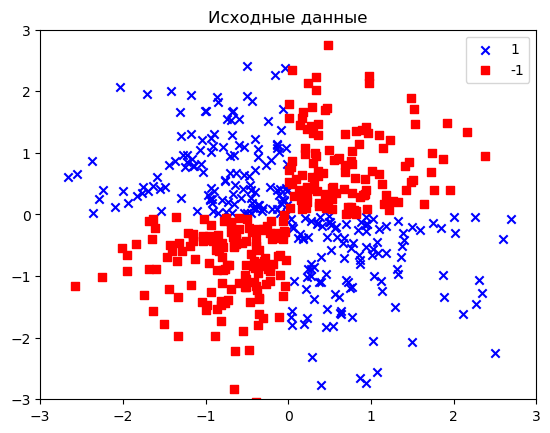

In [2]:
np.random.seed(0)
X = np.random.randn(512, 2)
y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
y = np .where (y, 1, -1)
plt.figure(1)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='b', marker='x', label='1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0, 3.0); plt.xlim(-3.0, 3.0)
plt.legend()
plt.title("Исходные данные")
plt.show()

Задание 2. Создать и обучить модель классификации на основе построения дерева решений. выбрать оптимальные гиперпараметры модели.

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
clf = DecisionTreeClassifier(random_state=0)
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
                     'max_depth':[3,5,7,9]}

grid_tree = GridSearchCV(clf, param_grid)
grid_tree.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 7, 9]})

In [5]:
best_params = grid_tree.best_params_
print('\n best_params=', best_params)


 best_params= {'criterion': 'gini', 'max_depth': 7}


Определить и вывести на печать удельные количества ошибок на обучающем и тестовом подмножествах данных.

In [6]:
print(f'''Удельное количество ошибок на обучающем наборе: {np.mean(y_train != grid_tree.best_estimator_.predict(x_train))}
Удельное количество ошибок на тестовом наборе: {np.mean(y_test != grid_tree.best_estimator_.predict(x_test))}''')

Удельное количество ошибок на обучающем наборе: 0.0
Удельное количество ошибок на тестовом наборе: 0.01948051948051948


Построить график области решений при помощи функции plot_decision_regions(), разработанной ранее на практических занятиях.

In [8]:
def plotDecisionRegions(x, y, classifier, resolution=0.02, test_idx=None):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = [(1, 0, 0), (0, 0, 1), (0.5, 1, 0.5), (0.5, 0.5, 0.5), (0, 1, 1)]  # Красный, синий, светло-зеленый, серый, голубой
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
                    edgecolor='black', marker = markers[idx], label=cl)
        if test_idx:
            x_test = x[test_idx, :]
            plt.scatter(x_test[:, 0], x_test[:, 1], c='', alpha=1.0,
                        edgecolor='black', linewidths=1, marker='o', s=120,
                        label='test set')

C:\Users\dmitr\AppData\Local\Temp\ipykernel_2296\2893109082.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],
C:\Users\dmitr\AppData\Local\Temp\ipykernel_2296\2893109082.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=x[y==cl, 0], y=x[y==cl, 1], alpha=0.8, c=colors[idx],


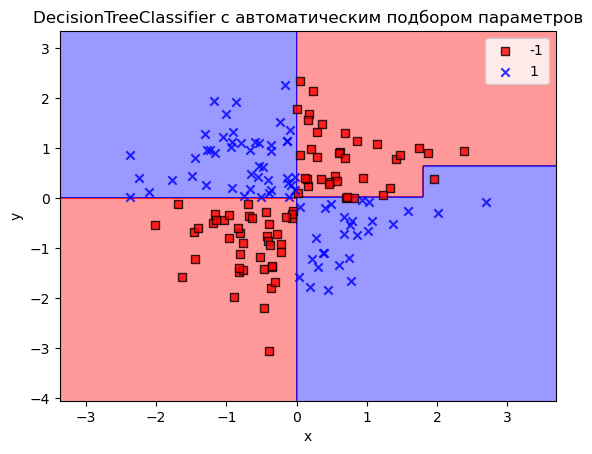

In [9]:
plotDecisionRegions(x_test, y_test, grid_tree.best_estimator_)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('DecisionTreeClassifier с автоматическим подбором параметров')
plt.show()